## Summary

This project explores frequency tables, cumulative distribution functions, statistics and categorical 
data visualizations based on the titanic data set using the pandas and seaborn packages. Support functions are
written to make exploration process easier.


Install packages

In [17]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns

Create a new directory to store the data set

In [18]:
# define the name of the directory to be created
# path = "C:/Users/""

# try:  
    # os.mkdir(path)
# except OSError:  
    # print ("Creation of the directory %s failed" % path)
# else:  
    # print ("Successfully created the directory %s " % path)

Downlad "Titanic: Machine Learning from Disaster" from Kaggle into cwd

In [19]:
# The direct link to the Kaggle data set
# data_url = ("https://www.kaggle.com/vikichocolate/titanic-machine-learning-from-disaster/titanic-machine-learning-from-disaster.zip")

# The local path where the data set is saved.
# local_filename = "titanic_444.zip"

# Kaggle Username and Password
# kaggle_info = {'UserName': "???", 'Password': "???"}

# Attempts to download the CSV file. Gets rejected because we are not logged in.
# r = requests.get(data_url)

# Login to Kaggle and retrieve the data.
# r = requests.post(r.url, data = kaggle_info)

# Writes the data to a local file one chunk at a time.
# f = open(local_filename, 'w')
# for chunk in r.iter_content(chunk_size = 512 * 1024): # Reads 512KB at a time into memory
    # if chunk: # filter out keep-alive new chunks
        # f.write(chunk)
# f.close()

Unzip the downloaded data set and store it into the created folder

In [20]:
# import zipfile
# with zipfile.ZipFile("C:/Users/gamarandor/titanic-machine-learning-from-disaster.zip", "r") as zip_ref:
     # zip_ref.extractall("C:/Users/gamarandor/titanic")

Read data into notebook 

In [21]:
titanic = pd.read_csv("titanic-machine-learning-from-disaster/train.csv")

Explorative data analysis (EDA) - Look into the data

In [22]:
titanic.shape

(891, 12)

In [23]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Is na?

In [27]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Univariate data analysis - "Fare" variable

Investigate the data series

In [28]:
print(titanic["Fare"].head())
print(titanic["Fare"].tail())
fare_unique = titanic["Fare"].unique()
print(type(fare_unique))
fare_unique_series =  pd.Series(fare_unique).sort_values()
print(fare_unique_series.head())
print(fare_unique_series.tail())

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64
886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Name: Fare, dtype: float64
<class 'numpy.ndarray'>
104    0.0000
163    4.0125
245    5.0000
152    6.2375
240    6.4375
dtype: float64
164    227.5250
75     247.5208
148    262.3750
23     263.0000
127    512.3292
dtype: float64


Create a grouped frequency interval data frame with cumulative sums based on the 
"Fare" data series.

In [29]:
qc_fare = pd.qcut(round(titanic["Fare"],1), q=14, precision=0)
qc_fare_interval_counts = qc_fare.value_counts().sort_index()

print(qc_fare_interval_counts)
print(type(qc_fare_interval_counts))
df_fare_interval = pd.DataFrame(qc_fare_interval_counts)
# DataFrame.cumsum(axis=None, skipna=True, *args, **kwargs)
df_fare_interval["cumsum"] =  qc_fare_interval_counts.cumsum()

print(df_fare_interval.info())
print(df_fare_interval)

(-0.1, 7.2]      83
(7.2, 7.8]       83
(7.8, 7.9]       75
(7.9, 8.0]       44
(8.0, 9.5]       33
(9.5, 12.5]      66
(12.5, 14.5]     73
(14.5, 19.3]     54
(19.3, 26.0]     85
(26.0, 27.9]     43
(27.9, 37.0]     62
(37.0, 56.9]     63
(56.9, 86.5]     64
(86.5, 512.3]    63
Name: Fare, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 14 entries, (-0.1, 7.2] to (86.5, 512.3]
Data columns (total 2 columns):
Fare      14 non-null int64
cumsum    14 non-null int64
dtypes: int64(2)
memory usage: 462.0 bytes
None
               Fare  cumsum
(-0.1, 7.2]      83      83
(7.2, 7.8]       83     166
(7.8, 7.9]       75     241
(7.9, 8.0]       44     285
(8.0, 9.5]       33     318
(9.5, 12.5]      66     384
(12.5, 14.5]     73     457
(14.5, 19.3]     54     511
(19.3, 26.0]     85     596
(26.0, 27.9]     43     639
(27.9, 37.0]     62     701
(37.0, 56.9]     63     764
(56.9, 86.5]     64     828
(86.5, 512.3]    63     891


85 passengers payed a fare between 19.3 and 26. In this class fell the highest number
of passenger, followed by 0 to 7.2 with 83 and 7.2 to 7.8 also with 83. 828 of 891
passengers fell into the intervals below the class 86.5 to 512.3 with the highest fare.

Create a function for making a grouped frequency interval data frame with cumulative sums

In [30]:
def frequency_interval_table(s,classes):
    qc_fare = pd.qcut(round(s,1), q=classes, precision=0)
    qc_fare_interval_counts = qc_fare.value_counts().sort_index()
    df_fare_interval = pd.DataFrame(qc_fare_interval_counts)
    df_fare_interval["cumsum"] =  qc_fare_interval_counts.cumsum()
    
    return df_fare_interval

print(frequency_interval_table(titanic["Fare"], 10))


               Fare  cumsum
(-0.1, 7.6]      97      97
(7.6, 7.9]      144     241
(7.9, 8.0]       44     285
(8.0, 10.5]      79     364
(10.5, 14.5]     93     457
(14.5, 21.7]     78     535
(21.7, 27.0]     89     624
(27.0, 39.7]     91     715
(39.7, 78.0]     89     804
(78.0, 512.3]    87     891


Kernel density plot of "Fare"

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


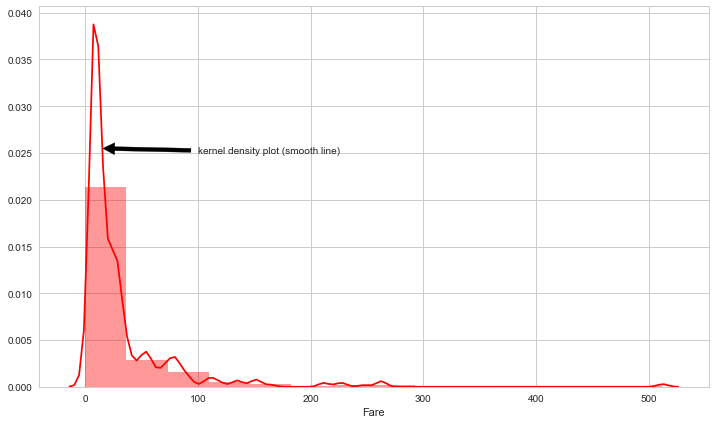

In [31]:
# bins : argument for matplotlib hist(), or None, optional
# Specification of hist bins, or None to use Freedman-Diaconis rule.

sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
sns.distplot(titanic["Fare"], color="red", bins=14)
plt.annotate("kernel density plot (smooth line)", xy=(11, 0.0255), xytext=(100, 0.025), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

Kernel density plot of "Fare" using a modified layout.

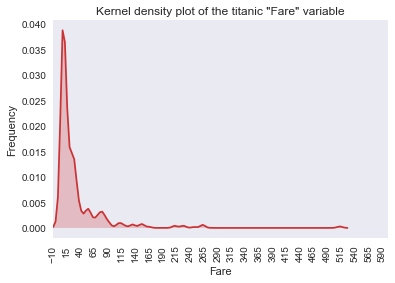

In [32]:
sns.set_style("dark")
sns.set_palette("Set1", 8, .75)
sns.kdeplot(titanic["Fare"], shade=True)
plt.xlabel("Fare")
plt.xlim((-10,600))
plt.ylabel("Frequency")
plt.title("Kernel density plot of the titanic \"Fare\" variable")
plt.xticks(np.arange(-10,600,25), rotation="vertical")
plt.legend().remove()
plt.show()

Ca. 3.8 % payed a fare of ca. 25 currency units. Ca. 1% payed a fare of ca. 525 currency units

Conditional Distributions of "Fare" using "Survived" as a Single Condition.

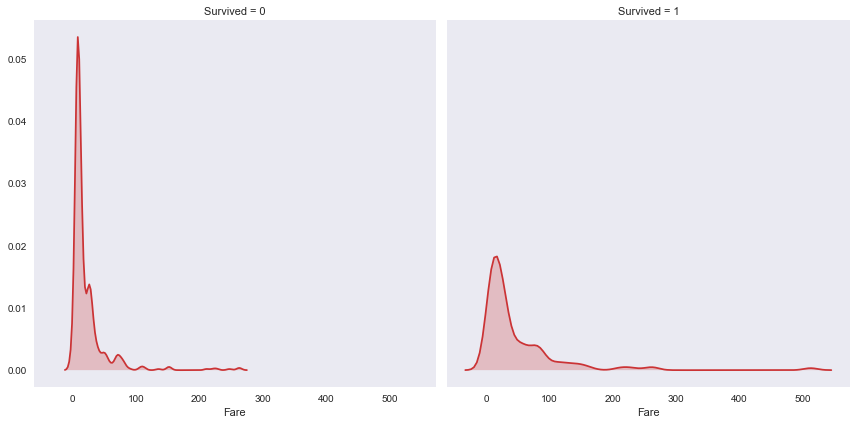

In [33]:
g_fare = sns.FacetGrid(titanic, col="Survived", size=6)
g_fare.map(sns.kdeplot, "Fare", shade=True)
plt.show()

The distribution of survived and not survived by "Fare" have a similar right skewed shape. However 
the not survived group stops under a fare of 300, while the the survived group extends above 500.
Nobody with a fare above 300 has not survived. It seem thes height of the fare variable is factor 
in surviving or not surviving.

Conditional Distributions of "Fare" using "Survived" and "Pclass" as a multiple Condition.

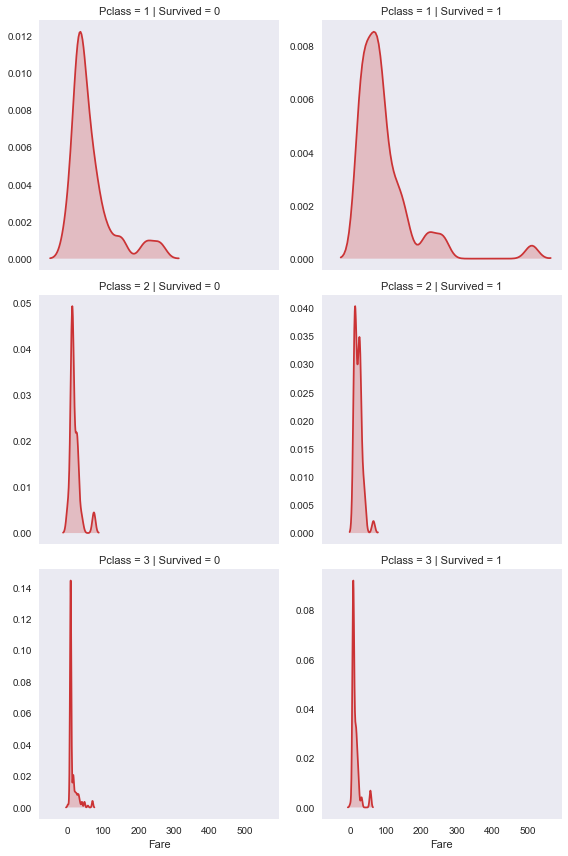

In [34]:
g_fare_44 = sns.FacetGrid(titanic, col="Survived", row="Pclass", size=4, sharey=False)
g_fare_44.map(sns.kdeplot, "Fare", shade=True)
plt.show()

Conditional Distributions of "Fare" using "Survived" and "Pclass" as a multiple Condition
grouped (colored) by sex.

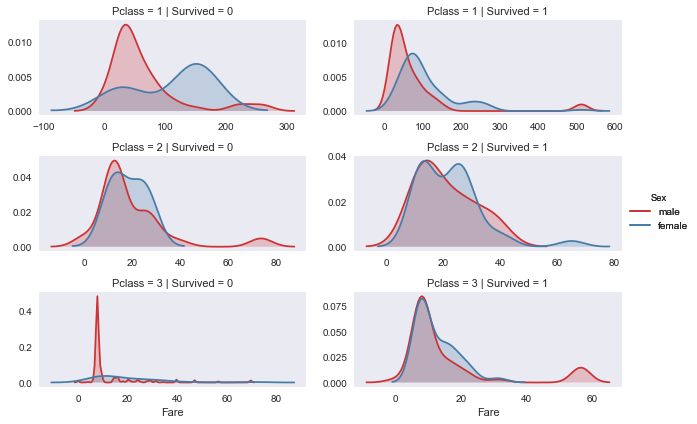

In [35]:
g_fare_55 = sns.FacetGrid(titanic, col="Survived", hue="Sex", row="Pclass", 
                          size=2, aspect=2, sharex=False, sharey=False)
g_fare_55.map(sns.kdeplot, "Fare", shade=True).add_legend().add_legend()

plt.show()

Most passenger are of class 3 with a fare between 0 and 80. Passengers of sex "man" of pclass 3 had higher chance of not surviving than any other group. Man with a fare of 50 and
onwards had a better chance of surviving. For men with a fare between 20 and 40 the frequency of surviving drops. The number of men within this class maybe investigated therefore.

Compute statistics for fare

In [36]:
titanic.describe()["Fare"]

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Create two quantile functions: 25% and 75% quantiles using in aggregate

In [63]:
def quantile_25(s):
    s.dropna(inplace=True)
    pd.Series(s)
    b = round(s.quantile(q=0.25),2)
    return b

def quantile_75(s):
    s.dropna(inplace=True)
    pd.Series(s)
    c = round(s.quantile(q=0.75),2)
    return c

def iqr(s):
    c = round(s.quantile(q=0.75),2)
    b = round(s.quantile(q=0.25),2)
    d = c - b
    return d
    
def data_range(s):
    min_a = round(s.min(), 2)
    max_b = round(s.max(), 2)
    d = max_b - min_a
    return d

Making a function calculating statistics using aggregate with created functions

In [38]:
# Input a series / column of a data frame
# titanic["Fare"]

def calc_stats(s):
    stats = s.agg(["count", "mean", "std", "var", "min", "max",
                                          quantile_25, "median", quantile_75, iqr,
                                          data_range, "kurtosis", "skew", ])
    return stats

titanic_fare_stats = calc_stats(titanic["Fare"])
print(titanic_fare_stats)

count           891.000000
mean             32.204208
std              49.693429
var            2469.436846
min               0.000000
max             512.329200
quantile_25       7.910000
median           14.454200
quantile_75      31.000000
iqr              23.090000
data_range      512.330000
kurtosis         33.398141
skew              4.787317
Name: Fare, dtype: float64


Create a frequency table counting the occurrences per unique variable

In [39]:
fare_frequency_table = round(titanic["Fare"], 0).value_counts().sort_index()

print(len(fare_frequency_table))

print(fare_frequency_table.head())
type(fare_frequency_table)
print(fare_frequency_table.shape)

fare_max = fare_frequency_table[fare_frequency_table==fare_frequency_table.max()]
print("Maximum count of unique variable (mode): ", fare_max )

fare_min= fare_frequency_table[fare_frequency_table==fare_frequency_table.min()]
print(len(fare_min))
print("Minimum count of unique variable: ", fare_min )

90
0.0    15
4.0     1
5.0     1
6.0     5
7.0    65
Name: Fare, dtype: int64
(90,)
Maximum count of unique variable (mode):  8.0    206
Name: Fare, dtype: int64
11
Minimum count of unique variable:  4.0      1
5.0      1
38.0     1
51.0     1
59.0     1
62.0     1
63.0     1
75.0     1
76.0     1
212.0    1
222.0    1
Name: Fare, dtype: int64


The most common price was 8 currency units with 206 counts. There were also 11 other fares
with only one count.

In [40]:
fare_frequency_table_sv = (round(titanic["Fare"], 0).
                           value_counts().sort_values(ascending=False))
fare_frequency_table_sv.head(n=10) 

8.0     206
7.0      65
26.0     46
13.0     46
10.0     43
16.0     28
14.0     28
9.0      27
27.0     17
28.0     16
Name: Fare, dtype: int64

The most fares with the highest frequency was 8 currency units, followed by 7, 26, 13, 10, 16 and so on.

#### Empirical cumulative distribution function (ECDF) - Writing a plot function
<p>
In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value. <a href="https://en.wikipedia.org/wiki/Empirical_distribution_function"> Wikipedia </a>
</p>
<p>
Reasoning:
</p>
<ul>
<li>
What do I need?
</li>
<li>
Series of x-values and series of y-values.
</li>
<li>
The x-values are the values / data points of the random variable or the values / data points of the data series.
</li>
<li>
The y-values are the cumulative probabilities ranging from 0 to 1.
</li>
<li>
The number of data points n for calculating the "jumps" 1/n.
</li>
</ul>

Prepare the data for ECDF

In [41]:
# Create a series of ordered x-values
fare_11 = titanic['Fare']

# x-data for the ECDF: x
x_values_fare = np.sort(fare_11)

print(x_values_fare[20:40])
print(x_values_fare[880:890])
len(x_values_fare)
print(x_values_fare.max())
print(x_values_fare.min())
print(x_values_fare.shape)

# Number of data points: n
n_11 = len(fare_11)
print(n_11)

# y-data for the ECDF: y
#  arange([start,] stop[, step,], dtype=None)
y_values_fare = np.arange(start=1, stop=n_11+1)/n_11

print(y_values_fare[0:5])
print(len(y_values_fare))
print(y_values_fare.shape)



[ 6.4958  6.4958  6.75    6.75    6.8583  6.95    6.975   6.975   7.0458
  7.05    7.05    7.05    7.05    7.05    7.05    7.05    7.0542  7.0542
  7.125   7.125 ]
[ 247.5208  247.5208  262.375   262.375   263.      263.      263.      263.
  512.3292  512.3292]
512.3292
0.0
(891,)
891
[ 0.00112233  0.00224467  0.003367    0.00448934  0.00561167]
891
(891,)


Plot the ECDF

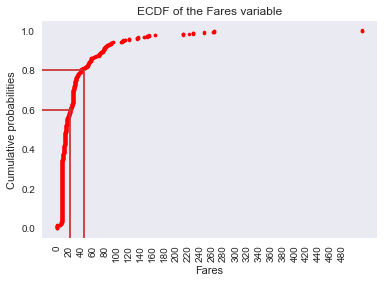

In [42]:
plt.plot(x_values_fare, y_values_fare, marker='.', linestyle='none', color="red")
plt.xlabel("Fares")
plt.ylabel("Cumulative probabilities")

plt.axhline(y=.6, xmin=0, xmax=0.09)
plt.axvline(x=21, ymin=0, ymax=0.6)

plt.axhline(y=.8, xmin=0, xmax=0.12)
plt.axvline(x=45, ymin=0, ymax=0.77)

plt.title("ECDF of the Fares variable")

plt.xticks(np.arange(0,500,20), rotation='vertical')

plt.show()

60% ot the titanic passengers payed a fare of equal to 20 "pounds" or less. 80% of the titanic passengers payed a fare of equal to 45 "pounds" or less.

Turn the code into a function

In [43]:
def ecdf(s, name):
    """Compute ECDF for a one-dimensional array of measurements."""
    # s is a data series
    # name is a string
    # Create a series of ordered x-values
    x = np.sort(s)
    # Number of data points: n
    n = len(s)
    # y-data for the ECDF: y
    y = np.arange(start=1, stop=n+1)/n
    # Plot the ECDF
    plt.plot(x, y, marker='.', linestyle='none', color="red")
    plt.xlabel(name)
    plt.ylabel("Cumulative probabilities")
    plt.title("Empirical cumulative distribution function (ECDF)")
    plt.show()

#### Univariate data analysis - "Age" variable

Create a grouped frequency interval data frame with cumulative sums based on the 
"Age" data series.

In [44]:
frequency_interval_table(titanic["Age"], 10)

,Age,cumsum
"(-1.0, 14.0]",77,77
"(14.0, 19.0]",87,164
"(19.0, 22.0]",67,231
"(22.0, 25.0]",70,301
"(25.0, 28.0]",61,362
"(28.0, 32.0]",66,428
"(32.0, 36.0]",91,519
"(36.0, 41.0]",53,572
"(41.0, 50.0]",78,650
"(50.0, 80.0]",64,714


C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


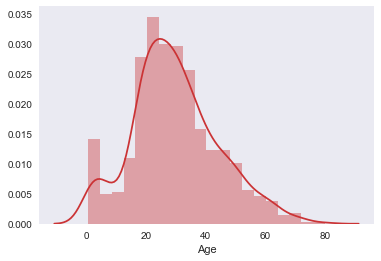

In [45]:
sns.distplot(titanic["Age"].dropna())
plt.show()

Displaying only the kernel density plot without histogram.

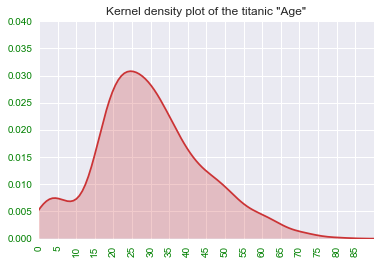

In [46]:
sns.set_style("darkgrid")
sns.kdeplot(titanic["Age"].dropna(), shade=True)
plt.xticks(np.arange(0,90,5), rotation="vertical", color="green")
plt.yticks(color="green")
plt.xlim((0,90))
plt.ylim((0,0.04))
plt.legend().remove()
plt.title("Kernel density plot of the titanic \"Age\"")
plt.show()

Kernel density plot with a modified layout.

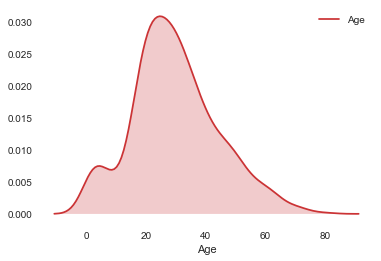

In [47]:
sns.set_style("white")
sns.kdeplot(titanic["Age"].dropna(), shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom=True)
plt.show()

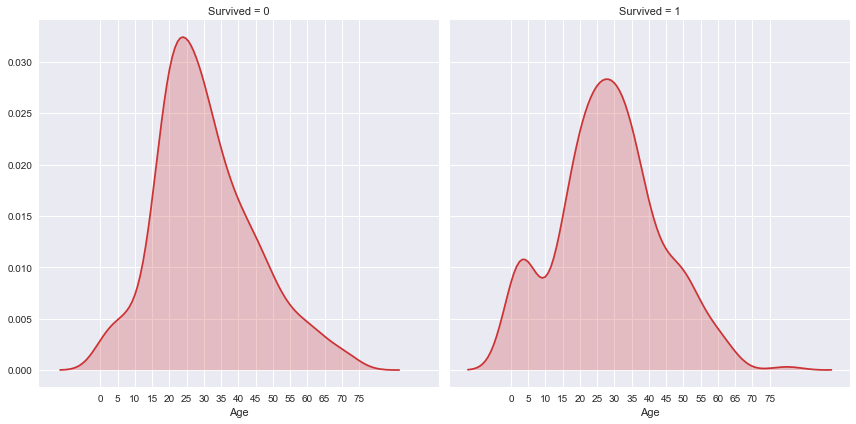

In [48]:
sns.set_style("darkgrid")
g_12 = sns.FacetGrid(titanic, col="Survived", size=6)
g_12.map(sns.kdeplot, "Age", shade=True)
plt.xticks(np.arange(0,80,5))
plt.show()

The survived plot has spike in the age of 0 to 5. This could indicate that very young children had 
a better survival chance.

Conditional Distributions of "Age" using "Survived" and "Pclass" as a multiple Condition.

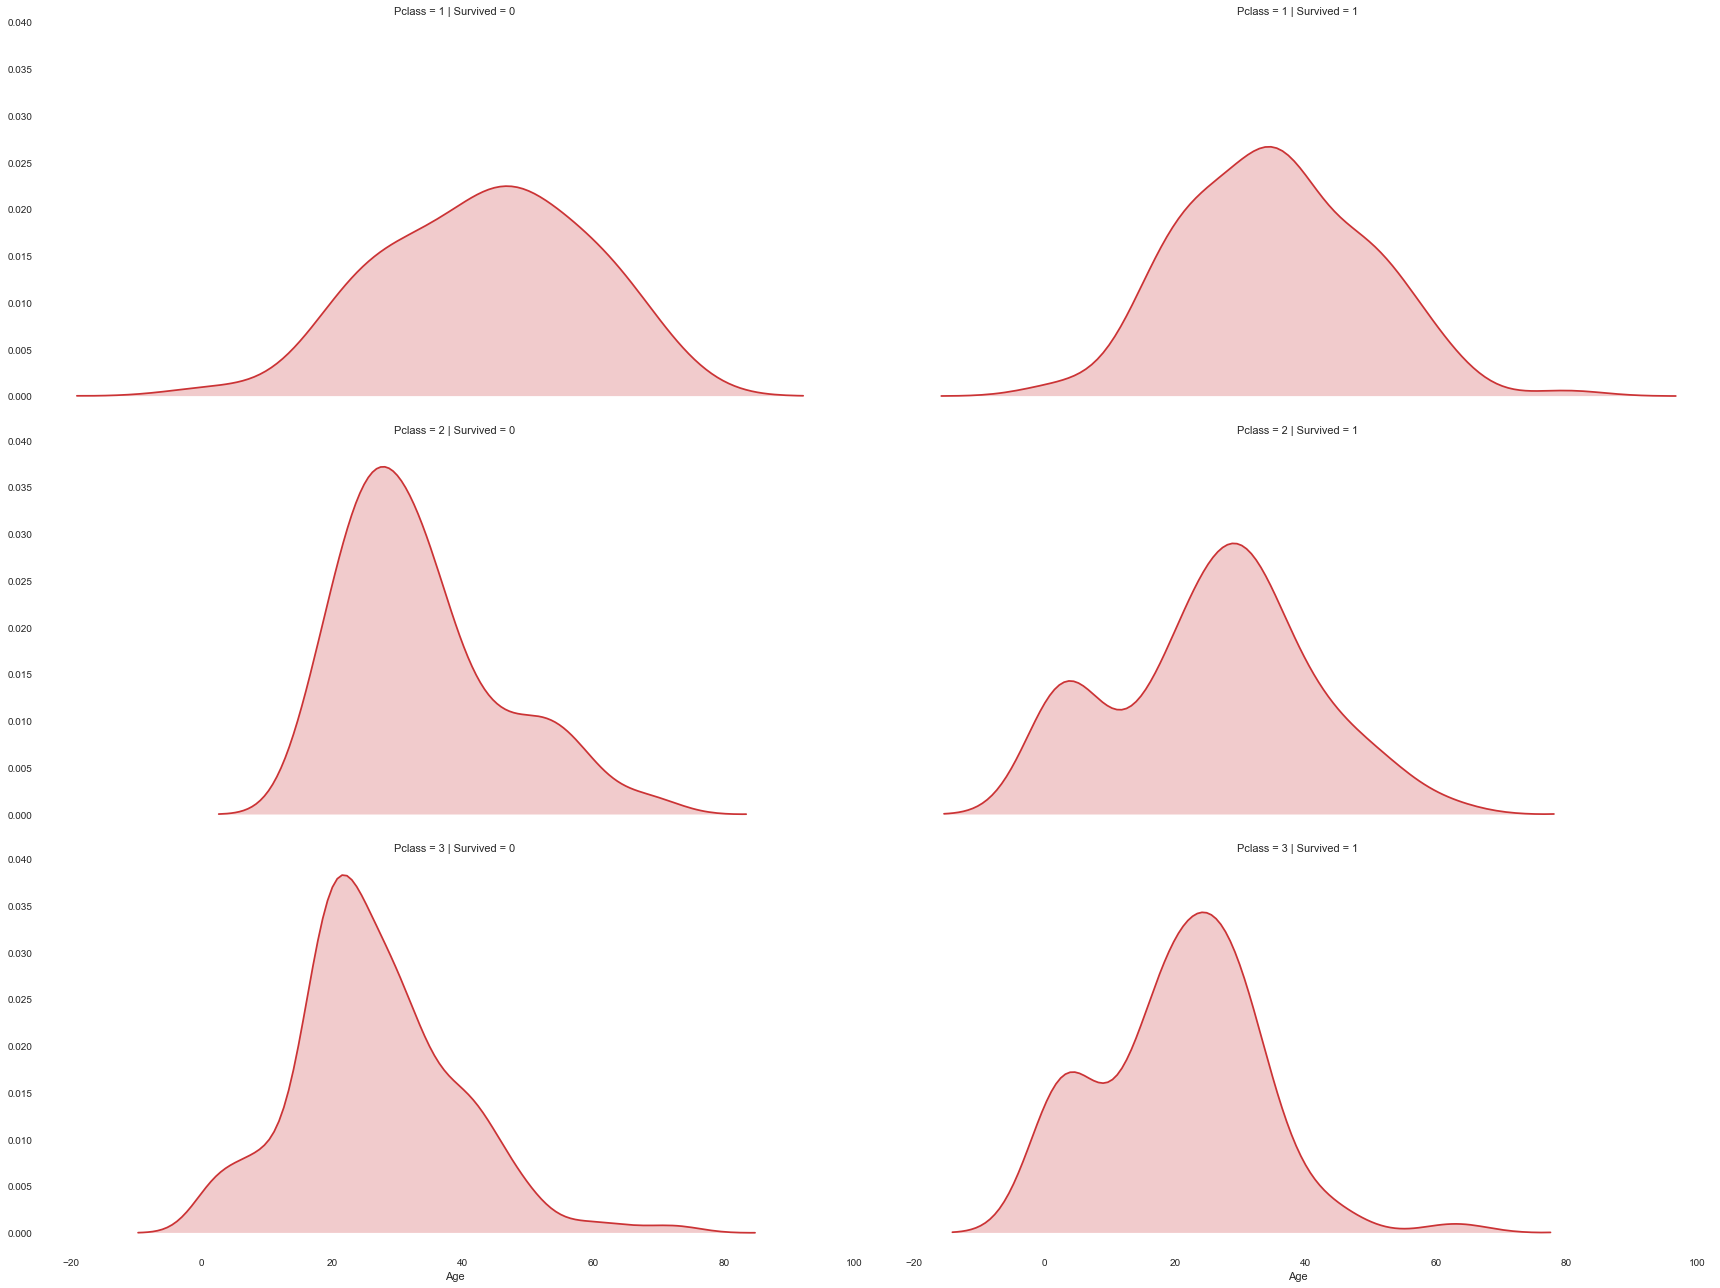

In [49]:
sns.set_style("white")
g_15=sns.FacetGrid(titanic, col= "Survived", row= "Pclass", size=6, aspect=2)
g_15.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

Conditional Distributions of "Age" using "Survived" and "Pclass" as a multiple Condition grouped (colored) by sex.

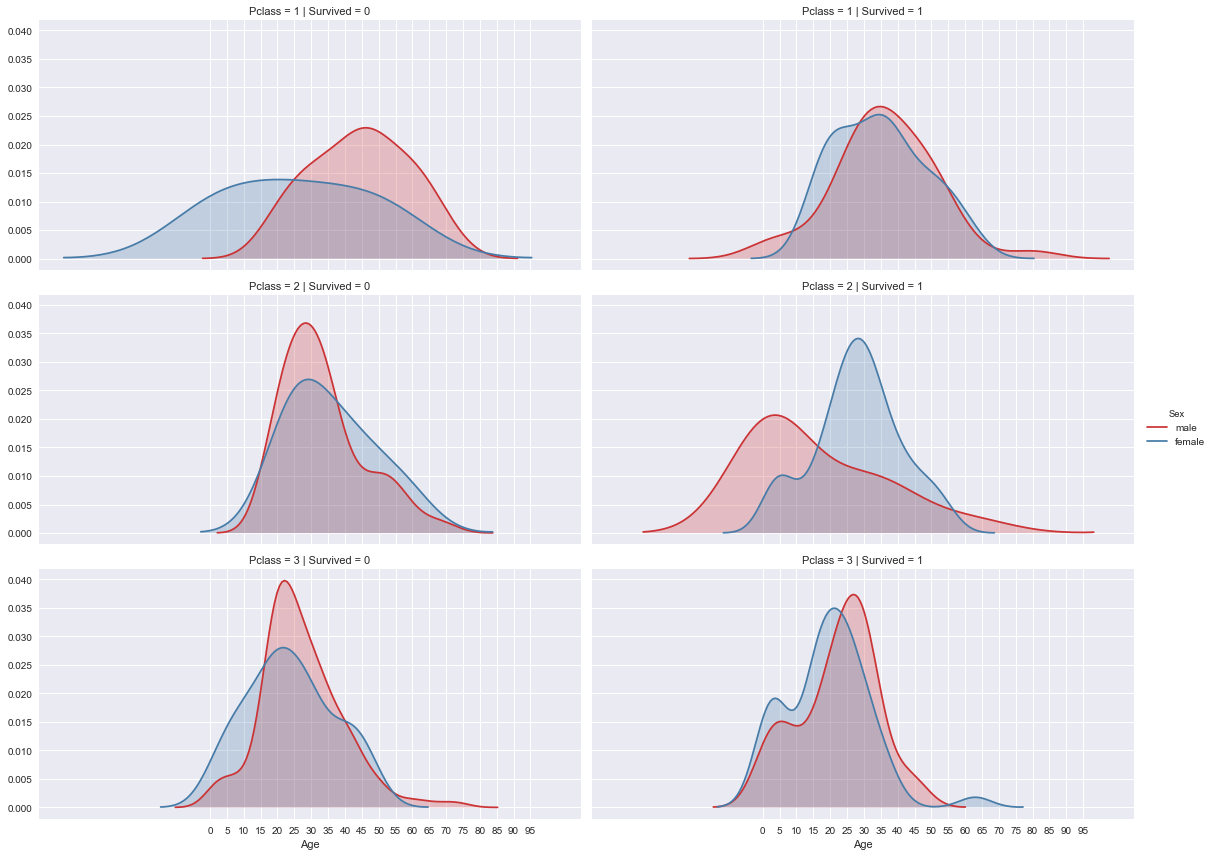

In [50]:
sns.set_style("darkgrid")

g_123 = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=4, aspect=2,
                      legend_out=True)
g_123.map(sns.kdeplot, "Age", shade=True).add_legend()
plt.xticks(np.arange(0,100,5))


plt.show()

Man between 10 and 50 had a lower chance of survival in every passenger class.

Quantiles

In [51]:
age_series = titanic["Age"] 
print(quantile_25(age_series))
print(quantile_75(age_series))

20.12
38.0


Calculate statistics - Age

In [52]:
titanic_age_stats = calc_stats(titanic["Age"])
print(titanic_age_stats)

count          714.000000
mean            29.699118
std             14.526497
var            211.019125
min              0.420000
max             80.000000
quantile_25     20.120000
median          28.000000
quantile_75     38.000000
iqr             17.880000
data_range      79.580000
kurtosis         0.178274
skew             0.389108
Name: Age, dtype: float64


Empirical cumulative distribution function (ECDF) - Age

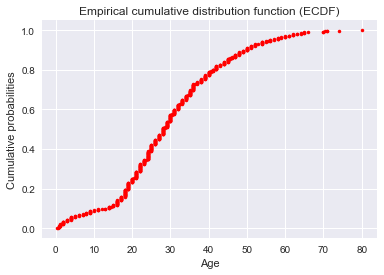

In [53]:
ecdf(titanic["Age"],"Age")

Ca. 20% of the titanic passengers were equal or less than 20 years old.
Ca. 60% of the titanic passengers were equal or less than 30 years old.
Ca. 90% of the titanic passenger were equal or less than 50 years old.

Univariate data analysis - "Pclass" variable

Kernel Density Plot - Pclass

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


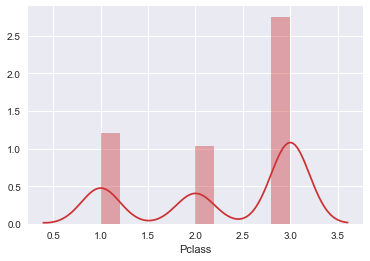

In [54]:
f, ax = plt.subplots()
sns.set_style("whitegrid")
sns.distplot(titanic["Pclass"], ax=ax)
plt.show()


Empirical cumulative distribution function (ECDF) - Pclass (categorical variable)

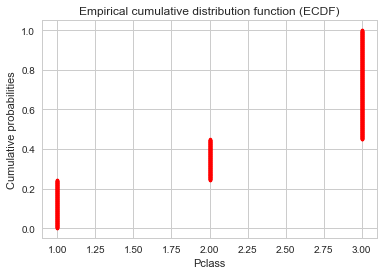

In [55]:
ecdf(titanic["Pclass"],"Pclass")

Pclass is a discrete variable. As this is the case the ECDF jumps from one value of the
variable to another and has a range of frequencies associated with it.
<ul>
<li>
Ca. 22% of the passengers were in Pclass 2 or less.
</li>
<li>
Ca. 42% of the passengers were in Pclass 3 or less.
</li>
</ul>

Calculate statistics - Pclass

In [56]:
titanic_pclass_stats = calc_stats(titanic["Pclass"])
print(titanic_pclass_stats)

titanic_pclass_levels = titanic["Pclass"].unique()
print(np.sort(titanic_pclass_levels))

count          891.000000
mean             2.308642
std              0.836071
var              0.699015
min              1.000000
max              3.000000
quantile_25      2.000000
median           3.000000
quantile_75      3.000000
iqr              1.000000
data_range       2.000000
kurtosis        -1.280015
skew            -0.630548
Name: Pclass, dtype: float64
[1 2 3]


Histograms and kernel density plots of Fare, Age and Pclass

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


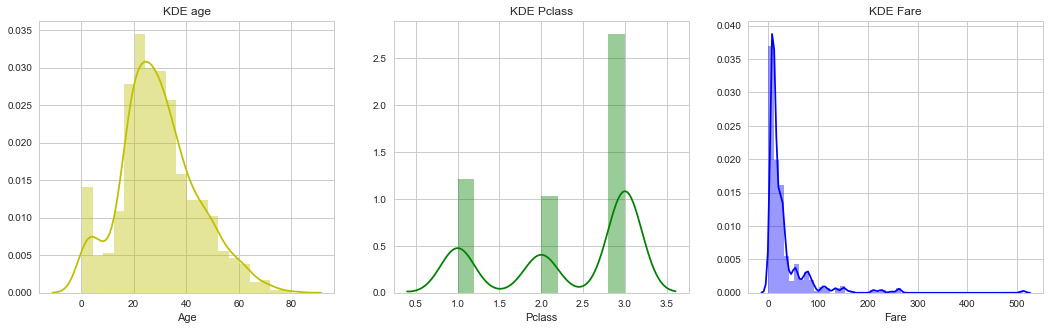

In [57]:
yef, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(18,5))
f.suptitle("Comparison of histograms and KDE's of Fare, Age, and Pclass")
sns.set_style("whitegrid")
sns.distplot(titanic["Age"], kde=True, color="y", ax=ax1)
ax1.set_title("KDE age")
sns.distplot(titanic["Pclass"], kde=True, color="g", ax=ax2)
ax2.set_title("KDE Pclass")
sns.distplot(titanic["Fare"], kde=True, color="b", ax=ax3)
ax3.set_title("KDE Fare")
plt.show()

Bivariate data analysis

Making a correlation matrix

In [58]:
titanic_444 = titanic.drop(["Name", "PassengerId"],axis=1).dropna()
names_444 = titanic_444.columns.values
titanic_corr_matrix = titanic_444.corr()
titanic_corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


Making a correlation plot

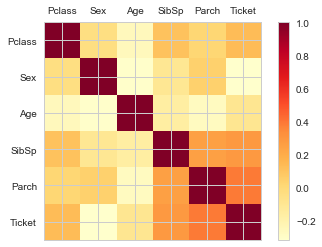

In [59]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
cax=ax.matshow(titanic_corr_matrix, cmap="YlOrRd")
ax.set_xticklabels(names_444)
ax.set_yticklabels(names_444)
fig.colorbar(cax)
plt.show()


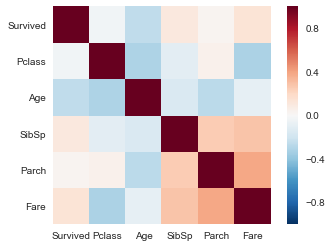

In [60]:
sns.heatmap(titanic_corr_matrix, square=True)
plt.show()

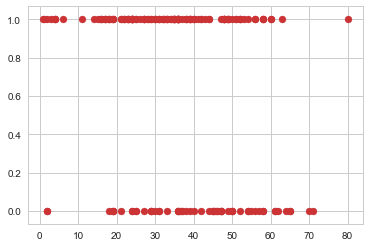

In [61]:
plt.scatter(x=titanic_444["Age"].dropna(), y=titanic_444["Survived"])
plt.show()

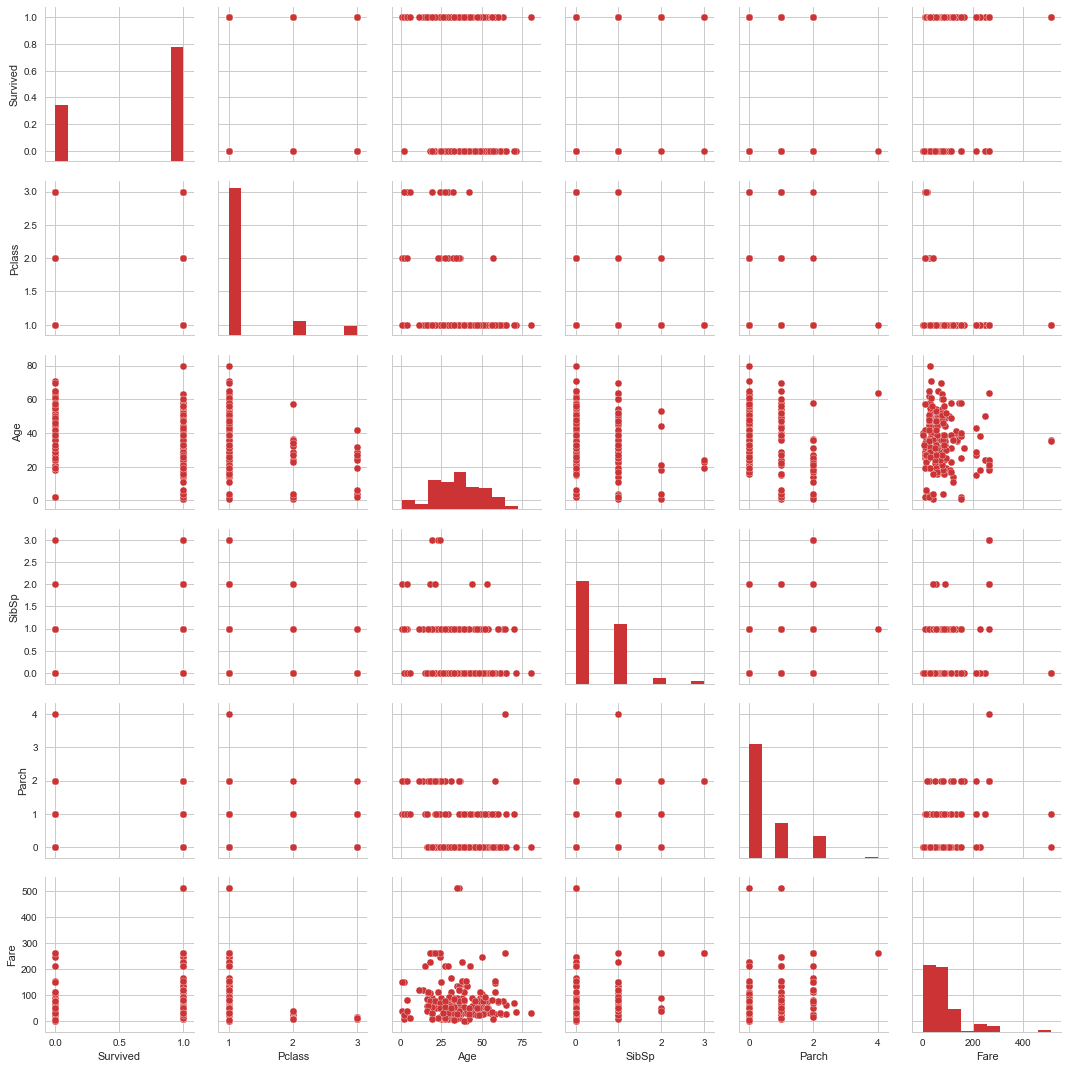

In [62]:
sns.pairplot(titanic_444)
plt.show()